In [ ]:
!pip install torch torchvision torchaudio
!pip install detectron2 -U
!pip install pycocotools opencv-python matplotlib


ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# navigate to your dataset zip
!unzip "/content/drive/MyDrive/multimodal_road_safety.v2i.coco.zip" -d /content/dataset

!pip install torch torchvision torchaudio
!pip install 'git+https://github.com/facebookresearch/detectron2.git'


Mounted at /content/drive
unzip:  cannot find or open /content/drive/MyDrive/multimodal_road_safety.v2i.coco.zip, /content/drive/MyDrive/multimodal_road_safety.v2i.coco.zip.zip or /content/drive/MyDrive/multimodal_road_safety.v2i.coco.zip.ZIP.
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-q6lfey2x
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-q6lfey2x
  Resolved https://github.com/facebookresearch/detectron2.git to commit a9c0821a12ad353fb2a96f019515990d5460c5ac
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.0 MB/s eta 0:00:00
  Created wheel f

In [ ]:
# Clear old registration
if "road_dataset_train" in DatasetCatalog.list():
    DatasetCatalog.remove("road_dataset_train")
    MetadataCatalog.remove("road_dataset_train")

if "road_dataset_val" in DatasetCatalog.list():
    DatasetCatalog.remove("road_dataset_val")
    MetadataCatalog.remove("road_dataset_val")

if "road_dataset_test" in DatasetCatalog.list():
    DatasetCatalog.remove("road_dataset_test")
    MetadataCatalog.remove("road_dataset_test")


In [ ]:
!ls /content/dataset/train
!ls /content/dataset/valid


ls: cannot access '/content/dataset/train': No such file or directory
ls: cannot access '/content/dataset/valid': No such file or directory


In [ ]:
!ls /content/dataset


ls: cannot access '/content/dataset': No such file or directory


In [ ]:
!ls /content


drive  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_json = "/content/dataset/train/_annotations.coco.json"
val_json   = "/content/dataset/valid/_annotations.coco.json"


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving multimodal_road_safety.v2i.coco.zip to multimodal_road_safety.v2i.coco.zip


In [ ]:
!mkdir -p /content/dataset
!unzip multimodal_road_safety.v2i.coco.zip -d /content/dataset


Archive:  multimodal_road_safety.v2i.coco.zip
  inflating: /content/dataset/README.dataset.txt  
  inflating: /content/dataset/README.roboflow.txt  
   creating: /content/dataset/test/
  inflating: /content/dataset/test/_annotations.coco.json  
 extracting: /content/dataset/test/img-101_jpg.rf.4286efd014a7a2ace4c4cae367756f2f.jpg  
 extracting: /content/dataset/test/img-160_jpg.rf.9e28444c7793e03d206affdd0a31e762.jpg  
 extracting: /content/dataset/test/img-169_jpg.rf.b7e680fd890fda2466a6fcccbe28b2ae.jpg  
 extracting: /content/dataset/test/img-185_jpg.rf.d6f66f86c4079621ad459fc19b5638d2.jpg  
 extracting: /content/dataset/test/img-194_jpg.rf.3534c51bbacc741581f206a3a16c295a.jpg  
 extracting: /content/dataset/test/img-212_jpg.rf.0696ede85a2616e2f4043a0c4c68da9e.jpg  
 extracting: /content/dataset/test/img-236_jpg.rf.809d149922ffa973188dd09f4492f072.jpg  
 extracting: /content/dataset/test/img-278_jpg.rf.8d77d0ba423411bd11dc376225ba6dc0.jpg  
 extracting: /content/dataset/test/img-291_

In [ ]:
!ls /content/dataset


README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!ls /content/dataset/train


_annotations.coco.json
img-100_jpg.rf.1113113a6431de840cb4051863103fa2.jpg
img-100_jpg.rf.5104aee71e11613cd104443d7fa3806c.jpg
img-100_jpg.rf.abac127cbbec7677bdd34c8696e6011c.jpg
img-102_jpg.rf.052b5c66a8b3ce74d5bcc978ae193892.jpg
img-102_jpg.rf.438d3acd9c1632d86bb2ad9476125016.jpg
img-102_jpg.rf.933361026001b386f1e2dd03f9f4ad18.jpg
img-108_jpg.rf.90dbb00ada2002dec794a441b1dbb37d.jpg
img-108_jpg.rf.ae27904dc07ba915da74838756b117f9.jpg
img-108_jpg.rf.be77e1986e29aa30b39b5b78be337e15.jpg
img-109_jpg.rf.bd79711626fe883690af7a52aa798cad.jpg
img-109_jpg.rf.c28084d19cf31dc4b701add860c89de5.jpg
img-109_jpg.rf.e4af50bf65f380e783ddc92682bf5ee7.jpg
img-10_jpg.rf.27a00e6ae8e5869995aa9f30931f5a69.jpg
img-10_jpg.rf.af637bea886ba53d08ae0dec9a6f6faa.jpg
img-10_jpg.rf.b4be2f22a5d258fbb132423d5c32c1bb.jpg
img-110_jpg.rf.35125c338d723eab3ff93c8346e06bd3.jpg
img-110_jpg.rf.95317c0b19064d10304a61ff6774223a.jpg
img-110_jpg.rf.e39673a90f7a9cefc93e30a6176862d9.jpg
img-111_jpg.rf.72ad6409aefa3c4b0d614b4715b36

In [ ]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog

register_coco_instances("road_dataset_train", {}, "/content/dataset/train/_annotations.coco.json", "/content/dataset/train")
register_coco_instances("road_dataset_val", {}, "/content/dataset/valid/_annotations.coco.json", "/content/dataset/valid")

print("✅ Dataset successfully registered!")
print("Train:", len(DatasetCatalog.get("road_dataset_train")))
print("Val:", len(DatasetCatalog.get("road_dataset_val")))


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



✅ Dataset successfully registered!
Train: 2415
Val: 80


In [ ]:
from detectron2.data import MetadataCatalog
print(MetadataCatalog.get("road_dataset_train").thing_classes)


['potholes', 'cracks', 'manhole', 'pothole']


In [ ]:
import json

with open("/content/dataset/train/_annotations.coco.json") as f:
    data = json.load(f)

categories = [cat["name"] for cat in data["categories"]]
print(categories)


['potholes', 'cracks', 'manhole', 'pothole']


In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances

# 🔹 1. Remove old entries to avoid metadata conflicts
for d in ["road_dataset_train", "road_dataset_val"]:
    if d in DatasetCatalog.list():
        DatasetCatalog.remove(d)
        MetadataCatalog.remove(d)

# 🔹 2. Register datasets again
register_coco_instances(
    "road_dataset_train",
    {},
    "/content/dataset/train/_annotations.coco.json",
    "/content/dataset/train"
)
register_coco_instances(
    "road_dataset_val",
    {},
    "/content/dataset/valid/_annotations.coco.json",
    "/content/dataset/valid"
)

# 🔹 3. Force clean class names
MetadataCatalog.get("road_dataset_train").thing_classes = ["cracks", "manhole", "pothole"]
MetadataCatalog.get("road_dataset_val").thing_classes = ["cracks", "manhole", "pothole"]

print("✅ Fixed class names:", MetadataCatalog.get("road_dataset_train").thing_classes)


✅ Fixed class names: ['cracks', 'manhole', 'pothole']


In [ ]:
MetadataCatalog.get("road_dataset_train").thing_classes


['cracks', 'manhole', 'pothole']

In [ ]:
import json

# Paths to your annotation files
train_json = "/content/dataset/train/_annotations.coco.json"
val_json = "/content/dataset/valid/_annotations.coco.json"

def clean_coco_labels(json_path):
    with open(json_path, "r") as f:
        data = json.load(f)

    # Print current category names
    print(f"\nBefore cleanup ({json_path}): {[c['name'] for c in data['categories']]}")

    # Create mapping and find duplicates
    category_map = {}
    new_categories = []
    new_id = 1

    # Normalize names and remove duplicates
    seen = {}
    for cat in data["categories"]:
        name = cat["name"].strip().lower()
        if name == "potholes":  # Wrong label
            name = "pothole"
        if name not in seen:
            seen[name] = new_id
            new_categories.append({"id": new_id, "name": name})
            category_map[cat["id"]] = new_id
            new_id += 1
        else:
            category_map[cat["id"]] = seen[name]

    # Update annotations
    for ann in data["annotations"]:
        old_id = ann["category_id"]
        if old_id in category_map:
            ann["category_id"] = category_map[old_id]

    data["categories"] = new_categories

    with open(json_path, "w") as f:
        json.dump(data, f)

    print(f"✅ Cleaned {json_path}")
    print(f"After cleanup: {[c['name'] for c in new_categories]}")

# Run cleanup for both train and validation sets
clean_coco_labels(train_json)
clean_coco_labels(val_json)



Before cleanup (/content/dataset/train/_annotations.coco.json): ['potholes', 'cracks', 'manhole', 'pothole']
✅ Cleaned /content/dataset/train/_annotations.coco.json
After cleanup: ['pothole', 'cracks', 'manhole']

Before cleanup (/content/dataset/valid/_annotations.coco.json): ['potholes', 'cracks', 'manhole', 'pothole']
✅ Cleaned /content/dataset/valid/_annotations.coco.json
After cleanup: ['pothole', 'cracks', 'manhole']


In [ ]:
!cat /content/dataset/train/_annotations.coco.json | grep '"name"' | head


{"info": {"year": "2025", "version": "2", "description": "Exported from roboflow.com", "contributor": "", "url": "https://public.roboflow.com/object-detection/undefined", "date_created": "2025-10-29T18:36:35+00:00"}, "licenses": [{"id": 1, "url": "https://choosealicense.com/licenses/mit/", "name": "MIT"}], "categories": [{"id": 1, "name": "pothole"}, {"id": 2, "name": "cracks"}, {"id": 3, "name": "manhole"}], "images": [{"id": 0, "license": 1, "file_name": "verypoor_271_jpg.rf.9e6905c84e2f52117eab389d068d44e2.jpg", "height": 640, "width": 640, "date_captured": "2025-10-29T18:36:35+00:00", "extra": {"name": "verypoor_271.jpg"}}, {"id": 1, "license": 1, "file_name": "verypoor_039_jpg.rf.d46cc9393b3895517aeeadeb577d3703.jpg", "height": 640, "width": 640, "date_captured": "2025-10-29T18:36:35+00:00", "extra": {"name": "verypoor_039.jpg"}}, {"id": 2, "license": 1, "file_name": "poor_036_jpg.rf.49819348c9d16d5c5402d3a01bb29915.jpg", "height": 640, "width": 640, "date_captured": "2025-10-29T1

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog

def unregister_dataset(name):
    """Safely removes dataset + metadata from Detectron2 registries."""
    try:
        DatasetCatalog.remove(name)
    except KeyError:
        pass  # dataset not registered yet

    try:
        MetadataCatalog.remove(name)
    except KeyError:
        pass  # metadata not registered yet

# 🔹 Unregister before re-registering
unregister_dataset("road_dataset_train")
unregister_dataset("road_dataset_val")


In [ ]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances("road_dataset_train", {}, "/content/multimodal_road_safety/train/_annotations.coco.json", "/content/multimodal_road_safety/train")
register_coco_instances("road_dataset_val", {}, "/content/multimodal_road_safety/valid/_annotations.coco.json", "/content/multimodal_road_safety/valid")


In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog

# Clean up old registrations
for d in ["road_dataset_train", "road_dataset_val"]:
    if d in DatasetCatalog.list():
        DatasetCatalog.remove(d)
    if d in MetadataCatalog.list():
        MetadataCatalog.remove(d)


In [ ]:
# --- Step 4: Register datasets again ---
register_coco_instances("road_dataset_train", {}, train_json, train_images)
register_coco_instances("road_dataset_val", {}, val_json, val_images)

print("✅ Re-registered datasets:", list(MetadataCatalog.list()))


✅ Re-registered datasets: ['coco_2014_train', 'coco_2014_val', 'coco_2014_minival', 'coco_2014_valminusminival', 'coco_2017_train', 'coco_2017_val', 'coco_2017_test', 'coco_2017_test-dev', 'coco_2017_val_100', 'keypoints_coco_2014_train', 'keypoints_coco_2014_val', 'keypoints_coco_2014_minival', 'keypoints_coco_2014_valminusminival', 'keypoints_coco_2017_train', 'keypoints_coco_2017_val', 'keypoints_coco_2017_val_100', 'coco_2017_train_panoptic_separated', 'coco_2017_train_panoptic_stuffonly', 'coco_2017_train_panoptic', 'coco_2017_val_panoptic_separated', 'coco_2017_val_panoptic_stuffonly', 'coco_2017_val_panoptic', 'coco_2017_val_100_panoptic_separated', 'coco_2017_val_100_panoptic_stuffonly', 'coco_2017_val_100_panoptic', 'lvis_v1_train', 'lvis_v1_val', 'lvis_v1_test_dev', 'lvis_v1_test_challenge', 'lvis_v0.5_train', 'lvis_v0.5_val', 'lvis_v0.5_val_rand_100', 'lvis_v0.5_test', 'lvis_v0.5_train_cocofied', 'lvis_v0.5_val_cocofied', 'cityscapes_fine_instance_seg_train', 'cityscapes_fin

In [ ]:
!ls /content


dataset  multimodal_road_safety.v2i.coco.zip  sample_data
drive	 output				      swin_config.yaml


In [ ]:
!ls -R /content


/content:
dataset  multimodal_road_safety.v2i.coco.zip  sample_data
drive	 output				      swin_config.yaml

/content/dataset:
README.dataset.txt  README.roboflow.txt  test  train  valid

/content/dataset/test:
_annotations.coco.json
img-101_jpg.rf.4286efd014a7a2ace4c4cae367756f2f.jpg
img-160_jpg.rf.9e28444c7793e03d206affdd0a31e762.jpg
img-169_jpg.rf.b7e680fd890fda2466a6fcccbe28b2ae.jpg
img-185_jpg.rf.d6f66f86c4079621ad459fc19b5638d2.jpg
img-194_jpg.rf.3534c51bbacc741581f206a3a16c295a.jpg
img-212_jpg.rf.0696ede85a2616e2f4043a0c4c68da9e.jpg
img-236_jpg.rf.809d149922ffa973188dd09f4492f072.jpg
img-278_jpg.rf.8d77d0ba423411bd11dc376225ba6dc0.jpg
img-291_jpg.rf.a571e7aa3e92d07d6d7569daadcc4369.jpg
img-315_jpg.rf.38ea55ee2f8d79fae648a1a0a2de01ac.jpg
img-332_jpg.rf.bf9c7a1f3fefa70bd303b29a15e99db8.jpg
img-339_jpg.rf.2ca25b65e53164f6980e3f0f0a272935.jpg
img-354_jpg.rf.7f214b366cbdaea33dae84e15dbdb9c4.jpg
img-356_jpg.rf.996e79096274b21fcccf8a3deba97366.jpg
img-358_jpg.rf.fa477f932892ec3b7d3df35

In [ ]:
# ✅ Detectron2 Dataset Registration + Training Config
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
import os

# ----------------------------
# Step 1: Dataset Paths
# ----------------------------
dataset_root = "/content/dataset"

train_json = os.path.join(dataset_root, "train", "_annotations.coco.json")
val_json   = os.path.join(dataset_root, "valid", "_annotations.coco.json")

# ----------------------------
# Step 2: Clean old registrations (if any)
# ----------------------------
for d in ["road_dataset_train", "road_dataset_val"]:
    if d in DatasetCatalog.list():
        DatasetCatalog.remove(d)
    if d in MetadataCatalog.list():
        MetadataCatalog.remove(d)

# ----------------------------
# Step 3: Register datasets
# ----------------------------
register_coco_instances("road_dataset_train", {}, train_json, os.path.join(dataset_root, "train"))
register_coco_instances("road_dataset_val", {}, val_json, os.path.join(dataset_root, "valid"))

# ----------------------------
# Step 4: Config setup
# ----------------------------
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("road_dataset_train",)
cfg.DATASETS.TEST  = ("road_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 2

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3   # pothole, cracks, manhole

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0001
cfg.SOLVER.MAX_ITER = 5000

cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# ----------------------------
# Step 5: Train
# ----------------------------
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[10/29 19:34:52 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:00, 200MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/29 19:34:53 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[10/29 19:35:03 d2.utils.events]:  eta: 0:25:47  iter: 19  total_loss: 1.797  loss_cls: 1.507  loss_box_reg: 0.07808  loss_rpn_cls: 0.1898  loss_rpn_loc: 0.01824    time: 0.3199  last_time: 0.3599  data_time: 0.0215  last_data_time: 0.0048   lr: 1.9981e-06  max_mem: 1899M
[10/29 19:35:14 d2.utils.events]:  eta: 0:25:41  iter: 39  total_loss: 1.737  loss_cls: 1.444  loss_box_reg: 0.06696  loss_rpn_cls: 0.2202  loss_rpn_loc: 0.0263    time: 0.3158  last_time: 0.3175  data_time: 0.0054  last_data_time: 0.0045   lr: 3.9961e-06  max_mem: 1899M
[10/29 19:35:21 d2.utils.events]:  eta: 0:25:39  iter: 59  total_loss: 1.636  loss_cls: 1.322  loss_box_reg: 0.04426  loss_rpn_cls: 0.1936  loss_rpn_loc: 0.02085    time: 0.3176  last_time: 0.3579  data_time: 0.0073  last_data_time: 0.0073   lr: 5.9941e-06  max_mem: 1900M
[10/29 19:35:27 d2.utils.events]:  eta: 0:25:35  iter: 79  total_loss: 1.392  loss_cls: 1.125  loss_box_reg: 0.04283  loss_rpn_cls: 0.1576  loss_rpn_loc: 0.0176    time: 0.3171  last

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Create evaluator for validation dataset
evaluator = COCOEvaluator("road_dataset_val", cfg, False, output_dir="./output/")

# Create data loader for validation set
val_loader = build_detection_test_loader(cfg, "road_dataset_val")

# Run evaluation (prints mAP, IoU, etc.)
inference_on_dataset(trainer.model, val_loader, evaluator)


WARNING [10/29 20:05:05 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/29 20:05:05 d2.data.datasets.coco]: Loaded 80 images in COCO format from /content/dataset/valid/_annotations.coco.json
[10/29 20:05:05 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/29 20:05:05 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/29 20:05:05 d2.data.common]: Serializing 80 elements to byte tensors and concatenating them all ...
[10/29 20:05:05 d2.data.common]: Serialized dataset takes 0.04 MiB
[10/29 20:05:05 d2.evaluation.evaluator]: Start inference on 80 batches
[10/29 20:05:06 d2.evaluation.evaluator]: Inference done 11/80. Dataloading: 0.0013 s/iter. Inference: 0.0781 s/iter. Eval: 0.0002 s/iter. Total: 0.0796 s/iter. ETA=0:

OrderedDict([('bbox',
              {'AP': 36.209381582020065,
               'AP50': 66.05801279588155,
               'AP75': 36.44080820595138,
               'APs': 19.58768603912702,
               'APm': 20.46250140243709,
               'APl': 49.10069320357662,
               'AP-pothole': 36.209381582020065,
               'AP-cracks': nan,
               'AP-manhole': nan})])

In [ ]:
from detectron2.data.datasets import load_coco_json

dataset_dicts = load_coco_json("/content/dataset/valid/_annotations.coco.json", "/content/dataset/valid")
labels = [obj["category_id"] for d in dataset_dicts for obj in d["annotations"]]
import collections
print(collections.Counter(labels))


[10/29 20:07:00 d2.data.datasets.coco]: Loaded 80 images in COCO format from /content/dataset/valid/_annotations.coco.json
Counter({1: 187})


In [ ]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog

register_coco_instances(
    "road_dataset_train", {}, "/content/dataset/train/_annotations.coco.json", "/content/dataset/train"
)
register_coco_instances(
    "road_dataset_val", {}, "/content/dataset/valid/_annotations.coco.json", "/content/dataset/valid"
)

road_metadata = MetadataCatalog.get("road_dataset_train")


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader


In [ ]:
evaluator = COCOEvaluator("road_dataset_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "road_dataset_val")

print(inference_on_dataset(trainer.model, val_loader, evaluator))


[10/29 20:11:32 d2.data.datasets.coco]: Loaded 80 images in COCO format from /content/dataset/valid/_annotations.coco.json
[10/29 20:11:32 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/29 20:11:32 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/29 20:11:32 d2.data.common]: Serializing 80 elements to byte tensors and concatenating them all ...
[10/29 20:11:32 d2.data.common]: Serialized dataset takes 0.04 MiB
[10/29 20:11:32 d2.evaluation.evaluator]: Start inference on 80 batches
[10/29 20:11:33 d2.evaluation.evaluator]: Inference done 11/80. Dataloading: 0.0022 s/iter. Inference: 0.0885 s/iter. Eval: 0.0009 s/iter. Total: 0.0916 s/iter. ETA=0:00:06
[10/29 20:11:38 d2.evaluation.evaluator]: Inference done 65/80. Dataloading: 0.0038 s/iter. Inference: 0.0891 s/iter. Eval: 0.0005 s/iter. Total: 0.0935 s/iter. ETA

[10/29 20:36:45 d2.data.datasets.coco]: Loaded 80 images in COCO format from /content/dataset/valid/_annotations.coco.json


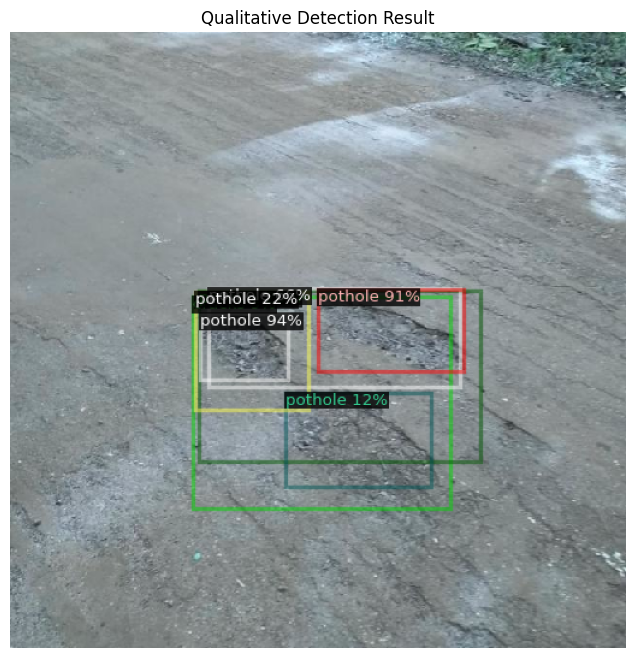

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import cv2
import matplotlib.pyplot as plt

# --- Dataset name used during registration ---
dataset_name = "road_dataset_val"  # keep this same as registration

# --- Get metadata ---
road_metadata = MetadataCatalog.get(dataset_name)
dataset_dicts = DatasetCatalog.get(dataset_name)

# --- Pick a random image from validation dataset ---
d = random.choice(dataset_dicts)
img_path = d["file_name"]  # this correctly accesses the image path

# --- Read the image ---
im = cv2.imread(img_path)
if im is None:
    raise ValueError(f"Image not found at path: {img_path}")

# --- Make predictions ---
outputs = predictor(im)

# --- Visualize results ---
v = Visualizer(im[:, :, ::-1], metadata=road_metadata, scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# --- Show the image ---
plt.figure(figsize=(10, 8))
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis("off")
plt.title("Qualitative Detection Result")
plt.show()


[10/29 20:38:08 d2.data.datasets.coco]: Loaded 80 images in COCO format from /content/dataset/valid/_annotations.coco.json


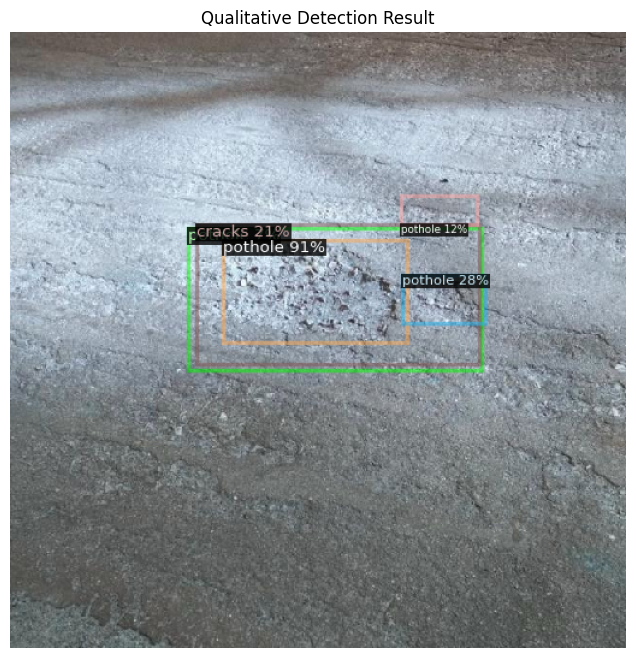

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import cv2
import matplotlib.pyplot as plt

# --- Dataset name used during registration ---
dataset_name = "road_dataset_val"  # keep this same as registration

# --- Get metadata ---
road_metadata = MetadataCatalog.get(dataset_name)
dataset_dicts = DatasetCatalog.get(dataset_name)

# --- Pick a random image from validation dataset ---
d = random.choice(dataset_dicts)
img_path = d["file_name"]  # this correctly accesses the image path

# --- Read the image ---
im = cv2.imread(img_path)
if im is None:
    raise ValueError(f"Image not found at path: {img_path}")

# --- Make predictions ---
outputs = predictor(im)

# --- Visualize results ---
v = Visualizer(im[:, :, ::-1], metadata=road_metadata, scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# --- Show the image ---
plt.figure(figsize=(10, 8))
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis("off")
plt.title("Qualitative Detection Result")
plt.show()


In [ ]:
import random
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import cv2
import matplotlib.pyplot as plt

# --- Dataset name used during registration ---
dataset_name = "road_dataset_train"  # keep this same as registration

# --- Get metadata ---
road_metadata = MetadataCatalog.get(dataset_name)
dataset_dicts = DatasetCatalog.get(dataset_name)

# --- Pick a random image from validation dataset ---
d = random.choice(dataset_dicts)
img_path = d["file_name"]  # this correctly accesses the image path

# --- Read the image ---
im = cv2.imread(img_path)
if im is None:
    raise ValueError(f"Image not found at path: {img_path}")

# --- Make predictions ---
outputs = predictor(im)

# --- Visualize results ---
v = Visualizer(im[:, :, ::-1], metadata=road_metadata, scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# --- Show the image ---
plt.figure(figsize=(10, 8))
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis("off")
plt.title("Qualitative Detection Result")
plt.show()


ModuleNotFoundError: No module named 'detectron2'

WARNING [10/29 20:22:47 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/29 20:22:47 d2.data.datasets.coco]: Loaded 35 images in COCO format from /content/dataset/test/_annotations.coco.json


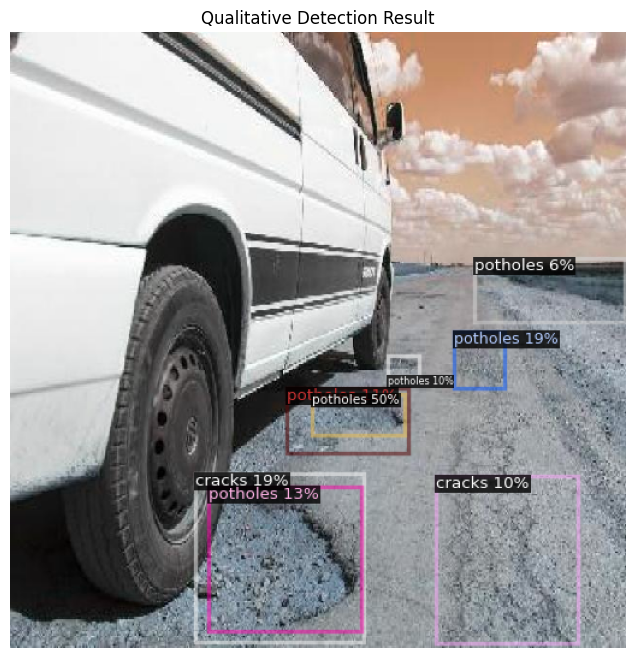

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import cv2
import matplotlib.pyplot as plt

# --- Dataset name used during registration ---
dataset_name = "road_dataset_test"  # keep this same as registration

# --- Get metadata ---
road_metadata = MetadataCatalog.get(dataset_name)
dataset_dicts = DatasetCatalog.get(dataset_name)

# --- Pick a random image from validation dataset ---
d = random.choice(dataset_dicts)
img_path = d["file_name"]  # this correctly accesses the image path

# --- Read the image ---
im = cv2.imread(img_path)
if im is None:
    raise ValueError(f"Image not found at path: {img_path}")

# --- Make predictions ---
outputs = predictor(im)

# --- Visualize results ---
v = Visualizer(im[:, :, ::-1], metadata=road_metadata, scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# --- Show the image ---
plt.figure(figsize=(10, 8))
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis("off")
plt.title("Qualitative Detection Result")
plt.show()


WARNING [10/29 20:24:33 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/29 20:24:33 d2.data.datasets.coco]: Loaded 35 images in COCO format from /content/dataset/test/_annotations.coco.json


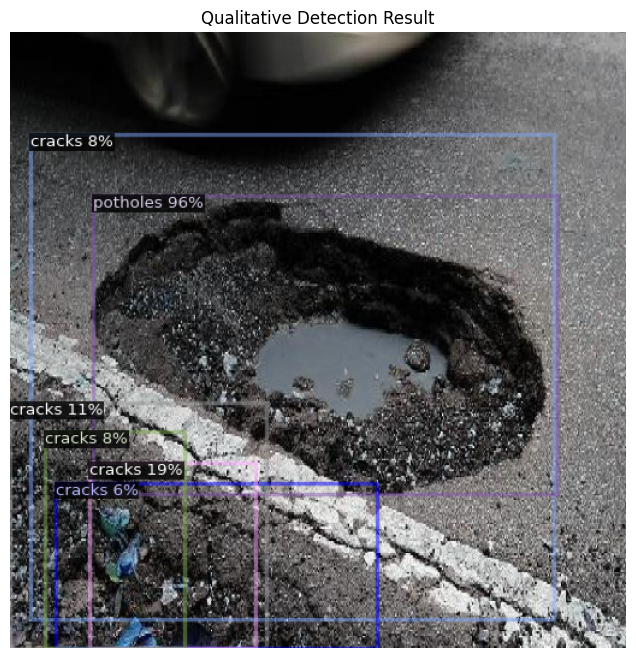

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import cv2
import matplotlib.pyplot as plt

# --- Dataset name used during registration ---
dataset_name = "road_dataset_test"  # keep this same as registration

# --- Get metadata ---
road_metadata = MetadataCatalog.get(dataset_name)
dataset_dicts = DatasetCatalog.get(dataset_name)

# --- Pick a random image from validation dataset ---
d = random.choice(dataset_dicts)
img_path = d["file_name"]  # this correctly accesses the image path

# --- Read the image ---
im = cv2.imread(img_path)
if im is None:
    raise ValueError(f"Image not found at path: {img_path}")

# --- Make predictions ---
outputs = predictor(im)

# --- Visualize results ---
v = Visualizer(im[:, :, ::-1], metadata=road_metadata, scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# --- Show the image ---
plt.figure(figsize=(10, 8))
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis("off")
plt.title("Qualitative Detection Result")
plt.show()


In [ ]:
!ls /content/dataset
!ls /content/dataset/train
!ls /content/dataset/valid


ls: cannot access '/content/dataset': No such file or directory
ls: cannot access '/content/dataset/train': No such file or directory
ls: cannot access '/content/dataset/valid': No such file or directory
